<a href="https://colab.research.google.com/github/vjihye/TIL/blob/master/3_3_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%89%B4%EC%8A%A4_%EA%B8%B0%EC%82%AC_%EB%B6%84%EB%A5%98_%EB%8B%A4%EC%A4%91_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import models
from keras import layers

In [3]:
from keras.datasets import reuters


In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print(train_data[0])
print(train_labels[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [ ]:
def vectorize_sequences(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dim=46):
  results = np.zeros((len(labels), dim))
  for i, l in enumerate(labels):
    results[i, l] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [ ]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 54ms/step - loss: 2.5982 - accuracy: 0.5585 - val_loss: 1.7141 - val_accuracy: 0.6620
Epoch 2/20
16/16 [==============================] - 1s 32ms/step - loss: 1.3936 - accuracy: 0.7066 - val_loss: 1.3103 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 1s 32ms/step - loss: 1.0316 - accuracy: 0.7830 - val_loss: 1.1607 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.8149 - accuracy: 0.8315 - val_loss: 1.0475 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6519 - accuracy: 0.8683 - val_loss: 0.9945 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.5198 - accuracy: 0.8926 - val_loss: 0.9628 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.4224 - accuracy: 0.9123 - val_loss: 0.9221 - val_accuracy: 0.8120
Epoch 8/20
16

In [ ]:
import matplotlib.pyplot as plt

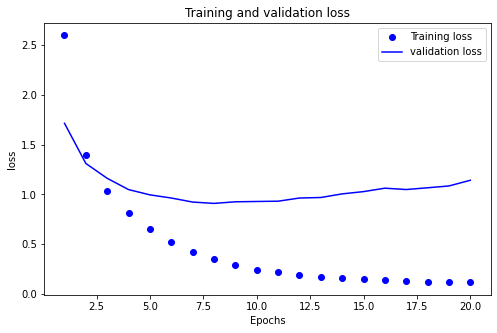

In [ ]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize = (8, 5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

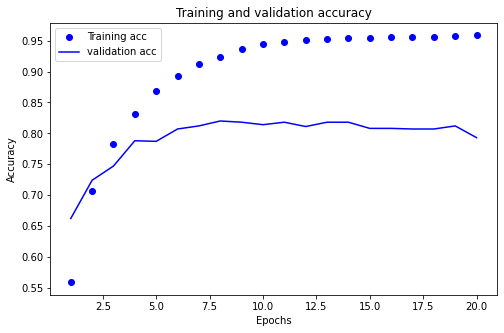

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize = (8, 5))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

9번째 에포크에서 과대적합 시작 -> 9번의 에포크로 새로운 모델을 훈련

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 28ms/step - loss: 2.6456 - accuracy: 0.5341
Epoch 2/9
16/16 [==============================] - 0s 29ms/step - loss: 1.4232 - accuracy: 0.7055
Epoch 3/9
16/16 [==============================] - 0s 30ms/step - loss: 1.0644 - accuracy: 0.7762
Epoch 4/9
16/16 [==============================] - 0s 29ms/step - loss: 0.8437 - accuracy: 0.8240
Epoch 5/9
16/16 [==============================] - 0s 29ms/step - loss: 0.6773 - accuracy: 0.8542
Epoch 6/9
16/16 [==============================] - 0s 30ms/step - loss: 0.5442 - accuracy: 0.8850
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.4357 - accuracy: 0.9073
Epoch 8/9
16/16 [==============================] - 1s 31ms/step - loss: 0.3533 - accuracy: 0.9218
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 1.0032 - accuracy: 0.7845
[1.0031898021697998, 0.7845057845115662]


In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
np.argmax(predictions[0])

3

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [5]:
print(len(train_data))
print(len(test_data))

8982
2246


In [6]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
print(train_labels[45])

20


In [8]:
import numpy as np

데이터를 벡터로 변환

In [9]:
def vectorize_sequences(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i,seq] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

레이블을 벡터로 변환 (원핫인코딩이 범주형 데이터에 널리사용)

In [10]:
def to_one_hot(labels, dim=46):
  results = np.zeros((len(labels), dim))
  for i, l in enumerate(labels):
    results[i, l] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_lablels = to_one_hot(test_labels)

In [12]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

**모델구성**

마지막 Dense층의 크기가 46 → 각 입력 샘플에 대해 46차원의 벡터를 출
력. 이 벡터의 각 원소는 각기 다른 출력 클래스가 인코딩 된 것
• 마지막 층에 softmax 활성화 함수 사용 → 각 입력 샘플마다 46개의 출력
클래스에 대한 확률 분포를 출력. 46차원 출력벡터를 만들며 output[i]는 어
떤 샘플이 클래스 i에 속할 확률. 46개 값을 모두 더하면 1이 됨

In [34]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [37]:
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

훈련검증 - 훈련데이터에서 1000개 샘플 떼어내어 검증세트로 만든다

In [38]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

20번의 에포크로 모델을 훈련

In [39]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 53ms/step - loss: 2.8848 - accuracy: 0.4248 - val_loss: 2.1500 - val_accuracy: 0.6110
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.7301 - accuracy: 0.6636 - val_loss: 1.5239 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.2427 - accuracy: 0.7471 - val_loss: 1.2603 - val_accuracy: 0.7300
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.9689 - accuracy: 0.7972 - val_loss: 1.1157 - val_accuracy: 0.7530
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.7867 - accuracy: 0.8320 - val_loss: 1.0252 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.6456 - accuracy: 0.8658 - val_loss: 0.9892 - val_accuracy: 0.7830
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5315 - accuracy: 0.8899 - val_loss: 0.9339 - val_accuracy: 0.8060
Epoch 8/20
16

• 손실과 정확도 곡선을 그림

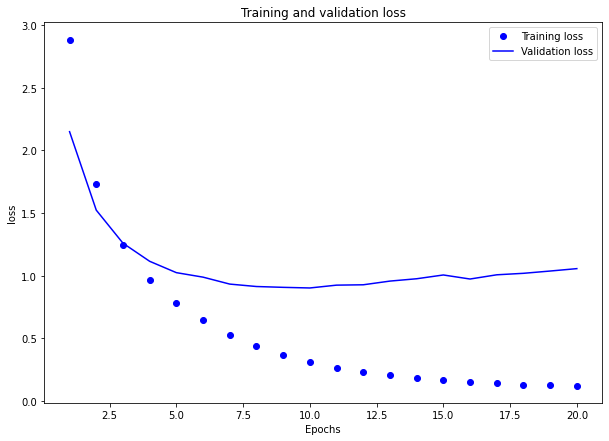

In [40]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize = (10,7))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

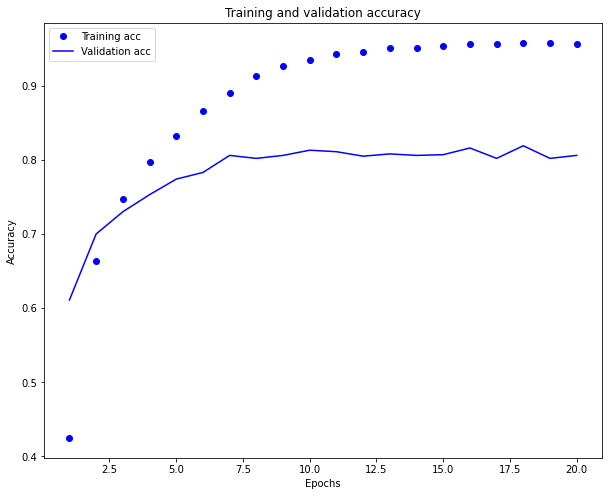

In [41]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize = (10,8))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

9번째 에포크에서 과대적합 시작→ 9번의 에포크로 새로운 모델을 훈련

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 2s 69ms/step - loss: 2.6937 - accuracy: 0.5129 - val_loss: 1.8822 - val_accuracy: 0.6000
Epoch 2/9
16/16 [==============================] - 1s 64ms/step - loss: 1.5588 - accuracy: 0.6655 - val_loss: 1.4083 - val_accuracy: 0.6840
Epoch 3/9
16/16 [==============================] - 1s 41ms/step - loss: 1.1781 - accuracy: 0.7511 - val_loss: 1.2062 - val_accuracy: 0.7360
Epoch 4/9
16/16 [==============================] - 1s 41ms/step - loss: 0.9465 - accuracy: 0.8016 - val_loss: 1.1003 - val_accuracy: 0.7640
Epoch 5/9
16/16 [==============================] - 1s 41ms/step - loss: 0.7773 - accuracy: 0.8379 - val_loss: 1.0221 - val_accuracy: 0.7800
Epoch 6/9
16/16 [==============================] - 1s 41ms/step - loss: 0.6429 - accuracy: 0.8643 - val_loss: 0.9806 - val_accuracy: 0.7930
Epoch 7/9
16/16 [==============================] - 1s 41ms/step - loss: 0.5310 - accuracy: 0.8887 - val_loss: 0.9280 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [30]:
predictions = model.predict(x_test)

In [31]:
predictions[0].shape

(46,)

In [32]:
np.sum(predictions[0])

1.0

In [33]:
np.argmax(predictions[0])

3